In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from numpy.linalg import inv,pinv

# Modelo de motor DC

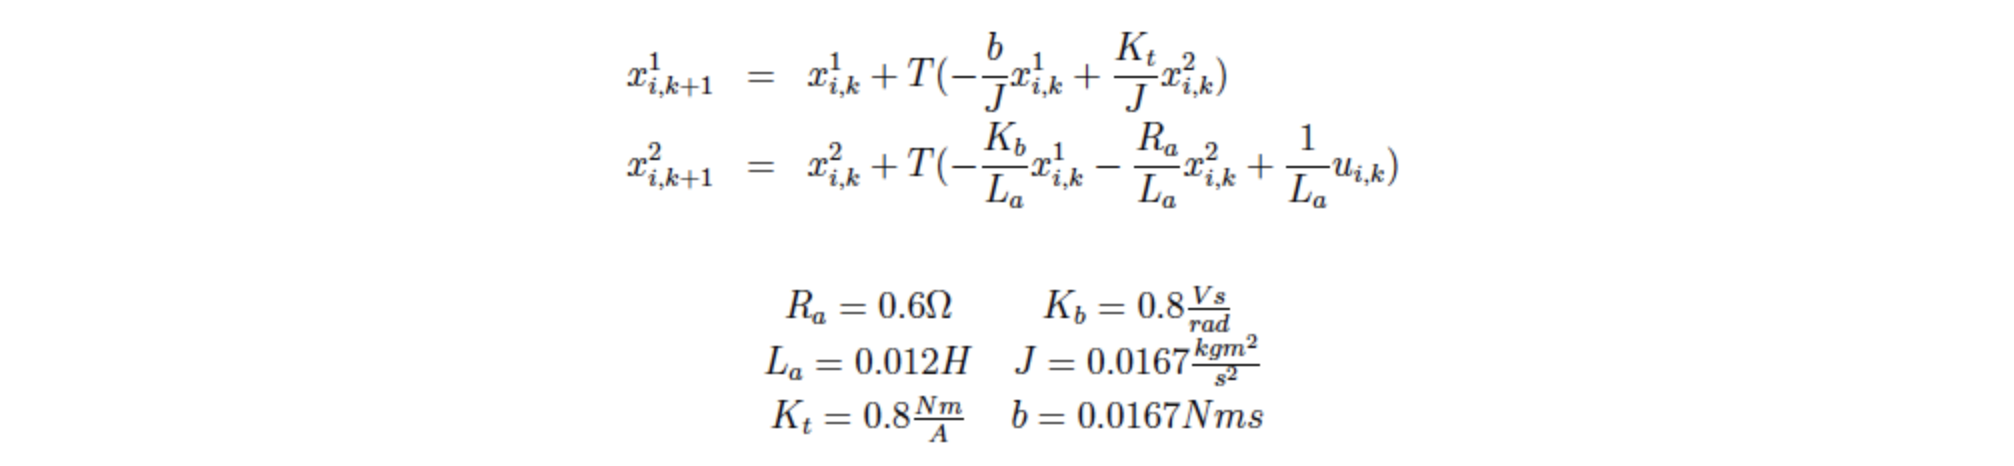

# Simulacion del modelo del motor

## Todos los vectores en columna


$$x =
\begin{bmatrix}
x_1 \\ 
\vdots \\ 
x_n \\ 
\end{bmatrix}
$$

In [ ]:
class General(object)


class MotorDc(object):
    # Propiedades del sistema


    def __init__ (self,t,x0=[.5,.1],T=0.01,ref=0):
        
        n = len(t)
        if type(ref) == (int or float):
            ref = np.zeros([n,1])

        self.xk= np.zeros([len(x0),n]) #np.array( [ [.5],[.3]]);
        self.xk[:,0]= x0
        
        self.T = T
        self.R = 1.26
        self.Kb = 0.0232
        self.L = 0.66
        self.J = 0.001
        self.Kt = 0.0232
        self.b = 0.001
        self.t = t
        
        self.x1d_k1 = ref
        
        self.x_k1= np.zeros_like(self.xk)[:,np.newaxis]
        self.f = np.zeros_like(self.xk)[:,np.newaxis]
        self.g = np.zeros_like(self.xk)[:,np.newaxis]
        
    
    def Sistema(obj,u,k):
        Gamma = 0
        Minterf = np.array([ [-obj.b / obj.J,  obj.Kt / obj.J],
                            [-obj.Kb / obj.L,  -obj.R / obj.L]] )
        
        obj.f = obj.xk[:,k] + obj.T * Minterf @ obj.xk[:,k]
        obj.f = obj.f[:,np.newaxis]

        Minterg = np.array([ 0, 1 / obj.L])
        obj.g = obj.T*Minterg
        obj.g = obj.g[:,np.newaxis]

        obj.x_k1 = obj.f + obj.g* u + Gamma;

        obj.xk[:,k+1] = obj.x_k1[:,0] #almaceno en la variable xk todos los estados
        return obj.x_k1
    
    def refx2dk(self,k):
        x1_k=self.xk[0,k]
        e1_k = x1_k - self.x1d_k1[k,0];
        ke = 0.9
        x2refk = self.J/self.Kt*( 1/self.T *(-x1_k +self.x1d_k1[k,0] + ke*e1_k)  + (self.b/self.J)*x1_k)
        return x2refk

    def Refk(self,k):
        return np.array( [ self.x1d_k1[k,0], self.refx2dk(k)] )[:,np.newaxis]

    def Plot(self,op=0):
        if op == 0:
            plt.plot(self.t,self.xk[0,:])
            plt.plot(self.t,self.xk[1,:])
            plt.xlabel('t')
            plt.ylabel('X edos')
            plt.legend( ['x0','x1'] )
        if op == 1:
            plt.plot(self.t,self.xk[0,:])
            plt.xlabel('t')
            plt.ylabel('X edos')
            plt.legend( ['x0'] )
            
    